## Import Necessary Packages

In [1]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
week_days=set(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
clean_data={}
index=-1

In [3]:
# Parse log file
log_file=urllib.request.urlopen('https://raw.githubusercontent.com/kaazima/Internet-Analysis-Project/master/statistics.log')
for line in log_file:
  unclean_data=line.decode("utf-8")
  if unclean_data[:3] in week_days:
    index+=1
    clean_data[index]={}
    clean_data[index]['Day']=unclean_data[:3]
    time=unclean_data.split()[3].split(':')
    clean_data[index]['Hour']=int(time[0])
    clean_data[index]['Min']=time[1]
  else:
    unclean_data=unclean_data.split(':')
    prop=unclean_data[0].strip()
    remain=unclean_data[1].strip()
    if prop=='Server':
      clean_data[index][prop]=remain.split('(')[0].strip()
    elif prop=='Latency' and remain!='FAILED':
      remain=remain.split('(')
      clean_data[index][prop]=float(remain[0].strip().split()[0])
      clean_data[index]['Jitter']=float(remain[1].split()[0])
    elif (prop=='Download' or prop=='Upload') and remain!='FAILED':
      clean_data[index][prop]=float(remain.split()[0])
    elif prop=='Packet Loss' and remain!='Not available.':
      clean_data[index][prop]=float(remain.split('%')[0])

## Generate a DataFrame that contains Cleansed Data

In [4]:
# Convert dictionary to pandas dataframe
data=pd.DataFrame.from_dict(clean_data,orient ='index')

In [5]:
data.head(7)

,Day,Hour,Min,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue,12,38,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue,12,40,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue,12,42,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue,12,44,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue,12,46,NaN,NaN,NaN,NaN,NaN,NaN
5,Tue,12,48,Cherrinet - K Net Solutions Pvt Ltd - Chennai,78.04,2.55,7.99,NaN,NaN
6,Tue,12,50,ACT Fibernet - Chennai,42.17,19.01,5.58,1.33,0.0


## Most Connected Server

In [6]:
print('Number of times each server is connected is as follows:\n')
data['Server'].value_counts()

Number of times each server is connected is as follows:



Airtel Broadband - Chennai                           697
Airconnect Fibernet - Chennai                        563
Airgenie - Chennai                                   510
TataSky Broadband Private Limited - Chennai          406
ACT Fibernet - Chennai                               399
Shyam Spectra - Chennai                              399
Sri Vari Network Private Limited - Chennai           391
Cherrinet - K Net Solutions Pvt Ltd - Chennai        375
Jio - Chennai                                        329
Pulse Telesystems - Chennai                           41
Vi India - Chennai                                    34
Arjuntelecom - Chennai                                25
TATASky Broadband Pvt Ltd - Bangalore                  4
JIFFY CABLE AND DATACOM - Bangalore                    3
Surround Networks Pvt Ltd. - Bengaluru                 3
North East Dataa Network Pvt Ltd - Bangalore           2
I-ON - Bengaluru                                       2
Airtel Broadband - Bangalore   

*   The most connected server is **Airtel Broadband - Chennai**



## Analysis of Network Outages

In [7]:
day_outages={}
hour_outages={}

In [8]:
# Initialise the number of outages for each day to "0"
for day in week_days:
  day_outages[day]=0
# Initialise the number of outages for each hour to "0"
for hour in range(24):
  hour_outages[hour]=0

In [9]:
# Count the number of outages for each day, and for each hour
for index in range(len(data)):
  if data.loc[index].isna().sum()==6:
    day_outages[data.loc[index]['Day']]+=1
    hour_outages[data.loc[index]['Hour']]+=1

#### Plot Network Outages on each day

In [10]:
# Sort day_outages in descending order
# Here, lambda function accepts a key-value pair as an argument and returns the value field from that pair
print(sorted(day_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (day,no of outages)

[('Tue', 197), ('Sat', 172), ('Wed', 154), ('Fri', 109), ('Mon', 44), ('Sun', 4), ('Thu', 0)]


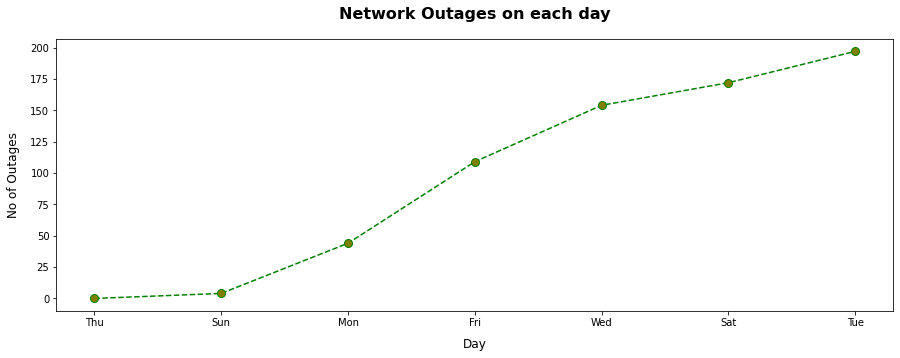

In [11]:
fig = plt.figure(figsize =(15, 5)) 
# Sort day_outages in ascending order
day,day_outage = zip(*sorted(day_outages.items(),key=lambda item:item[1]))
# Plotting the no of outages on each day
plt.plot(day, day_outage, color='green', linestyle='dashed', linewidth = 1.5, marker='o', markerfacecolor='olive', markersize=8)
# Naming the x and y axes
plt.xlabel('Day',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages on each day',pad=20,fontweight='bold',fontsize=16)
plt.show()



*   **Tuesday** had the most network outages
*   **Thursday** had the least network outages

#### Plot Network Outages for each hour

In [12]:
# Sort hour_outages in descending order
print(sorted(hour_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (hour,no of outages)

[(8, 127), (6, 121), (5, 120), (7, 120), (4, 104), (9, 36), (14, 25), (3, 14), (13, 4), (10, 2), (21, 2), (12, 1), (15, 1), (17, 1), (19, 1), (22, 1), (0, 0), (1, 0), (2, 0), (11, 0), (16, 0), (18, 0), (20, 0), (23, 0)]


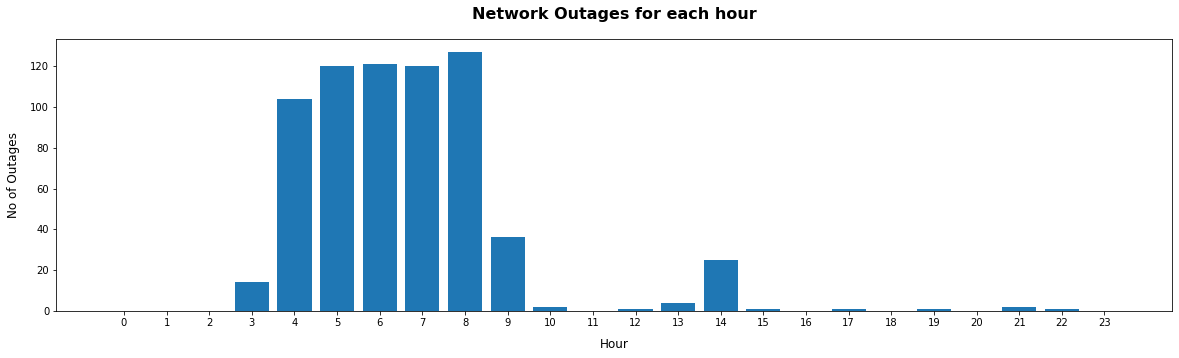

In [13]:
fig = plt.figure(figsize =(20, 5)) 
plt.bar(hour_outages.keys(), hour_outages.values())
plt.xticks(range(24))
plt.xlabel('Hour',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages for each hour',pad=20,fontweight='bold',fontsize=16)
plt.show()


*   **08:00 IST** had the most network outages
*   **00:00 IST, 01:00 IST, 02:00 IST, 11:00 IST, 16:00 IST, 18:00 IST, 20:00 IST, 23:00 IST** had the least network outages

## Analysis of Days

In [14]:
day_analytics=data.groupby('Day').agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'],'mean'))
display(day_analytics)

,Latency,Jitter,Download,Upload,Packet Loss
Day,,,,,
Fri,52.961620,20.997136,8.004036,2.756242,0.470609
Mon,58.219631,23.128190,7.660689,2.515389,0.611200
Sat,55.748619,20.791786,6.527937,2.548120,0.461600
Sun,52.356850,23.817102,9.675877,2.759493,0.525000
Thu,49.666064,21.427622,8.140542,2.465850,0.419512
Tue,59.416636,19.883309,6.998529,2.528876,0.457384
Wed,52.353893,23.741643,7.022612,2.381009,0.553361


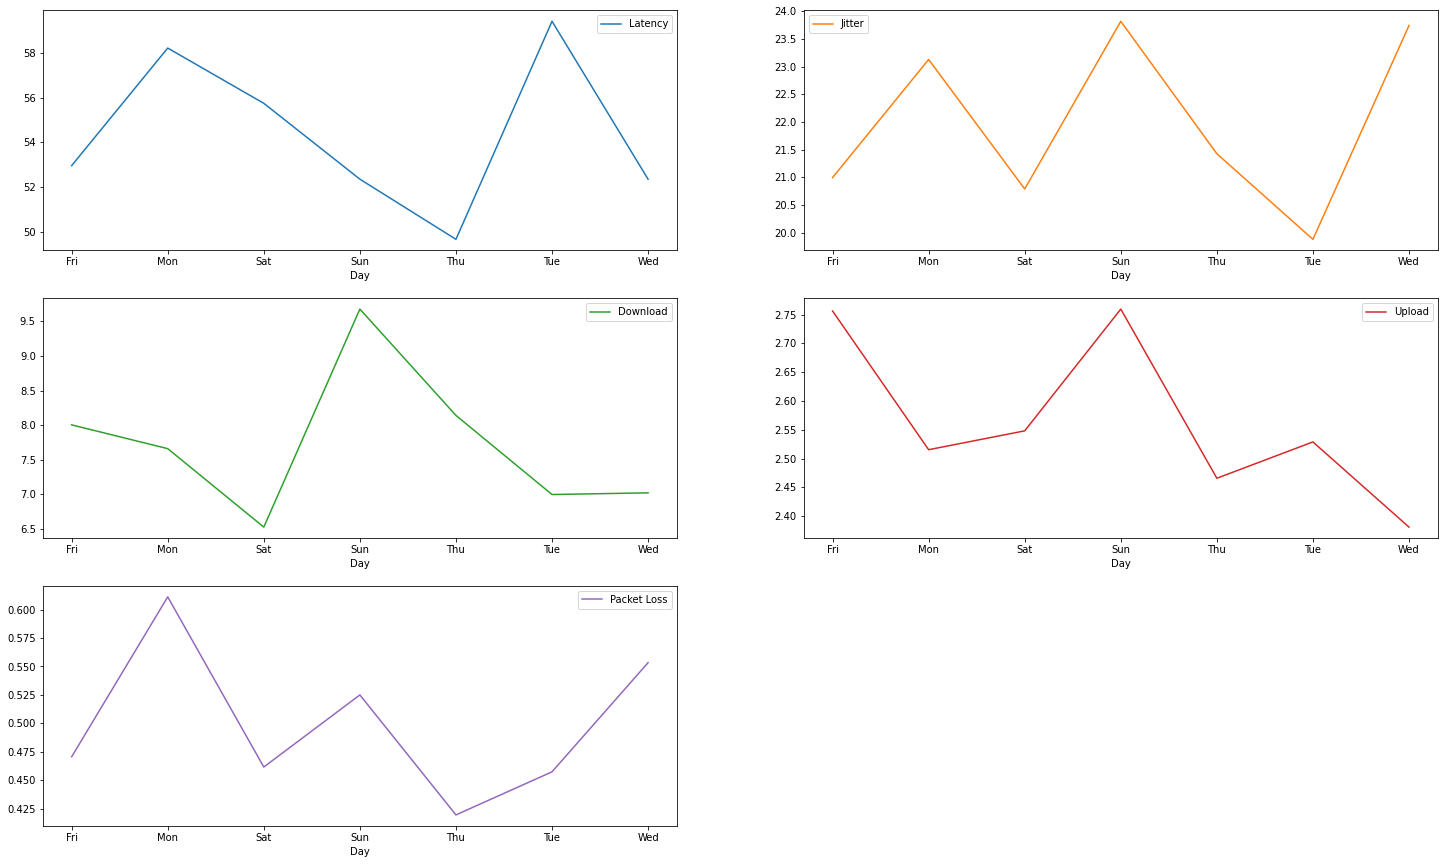

In [15]:
# Plot day_analytics
day_plot=day_analytics.plot(figsize=(25,15),subplots=True,sharex=False,layout=(3,2))

In [16]:
display(pd.DataFrame({'Minimum':day_analytics.idxmin(),'Maximum':day_analytics.idxmax()}))

,Minimum,Maximum
Latency,Thu,Tue
Jitter,Tue,Sun
Download,Sat,Sun
Upload,Wed,Sun
Packet Loss,Thu,Mon


## Analysis of Hours

In [17]:
hour_analytics=data.groupby('Hour').agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'], 'mean'))
display(hour_analytics)

,Latency,Jitter,Download,Upload,Packet Loss
Hour,,,,,
0,46.955333,20.731524,9.157788,3.968164,0.249412
1,44.729619,21.570000,12.671238,4.441714,0.443750
2,45.661095,21.347857,16.493238,4.926286,0.434783
3,45.897755,21.215459,18.220000,4.883246,0.629487
4,46.044848,18.794343,19.402396,4.650000,0.411364
5,48.496667,20.708167,17.677500,3.759667,0.508696
6,45.156034,21.433966,12.905690,3.888793,0.068421
7,47.503051,21.302203,10.699153,3.275254,1.296000
8,44.804933,27.014400,8.212000,2.800933,0.118750


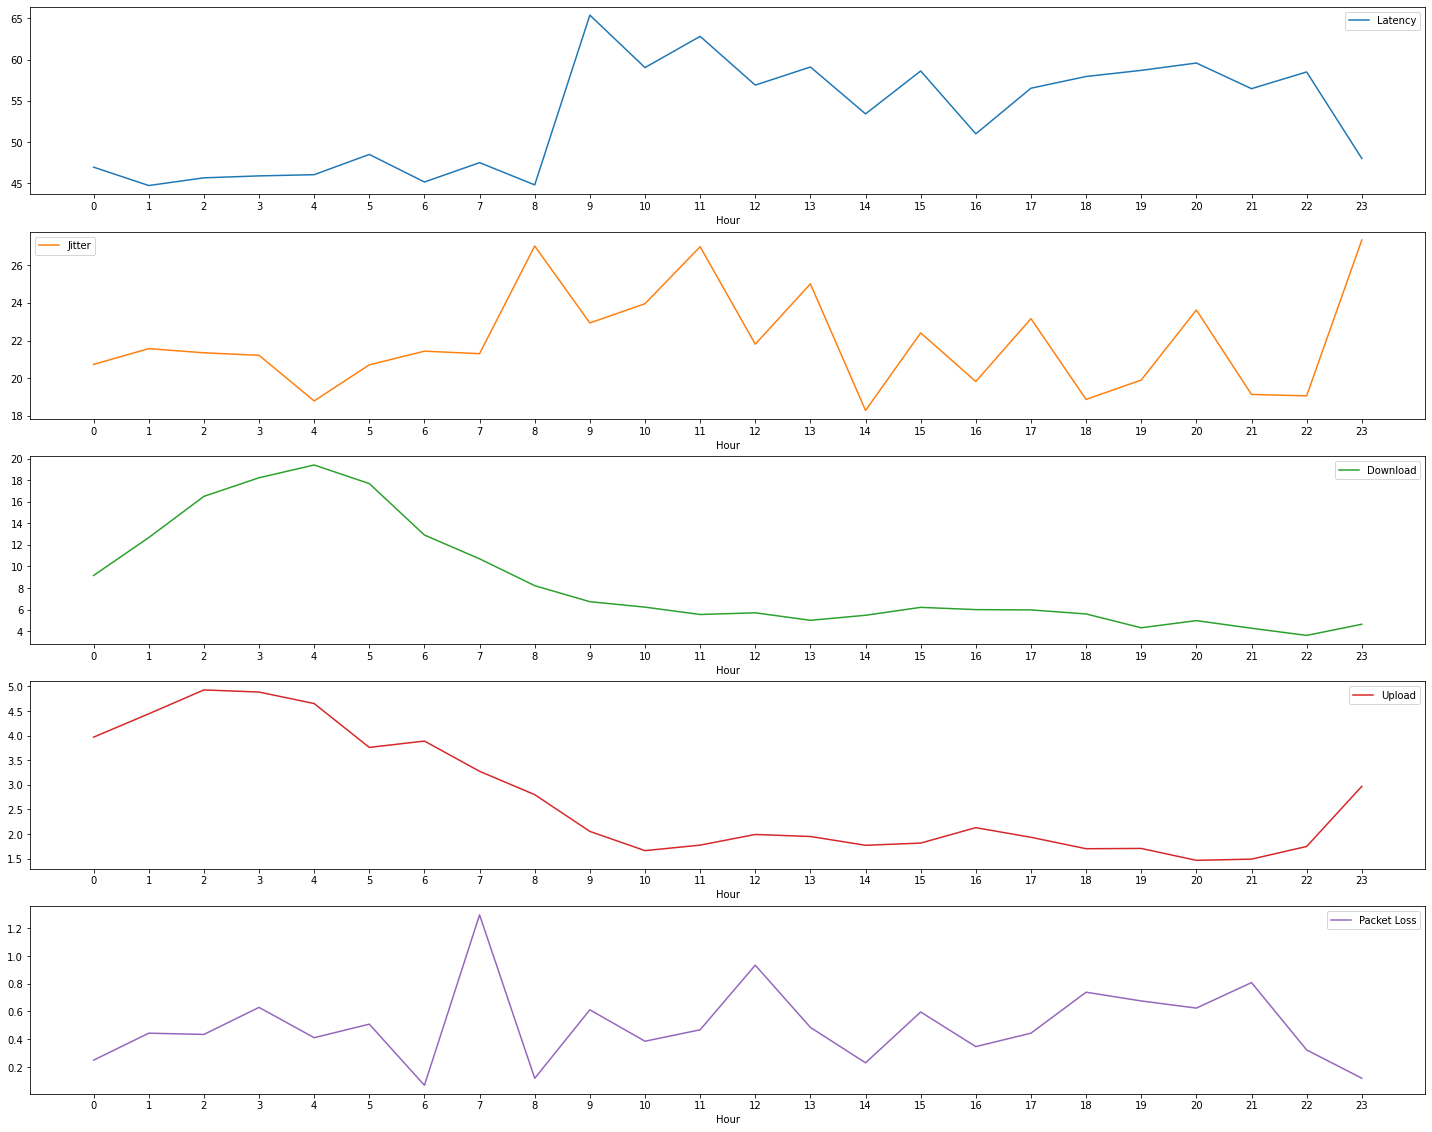

In [18]:
# Plot hour_analytics
hour_plot=hour_analytics.plot(figsize=(25,20),subplots=True,sharex=False,xticks=range(24))

In [19]:
display(pd.DataFrame({'Minimum at':hour_analytics.idxmin(),'Maximum at':hour_analytics.idxmax()}))

,Minimum at,Maximum at
Latency,1,9
Jitter,14,23
Download,22,4
Upload,20,2
Packet Loss,6,7


## Create an overall Analytics DataFrame

In [20]:
analytics=data.groupby(['Day', 'Hour']).agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'], 'mean'))
display(analytics)

Latency     Jitter   Download    Upload  Packet Loss
Day Hour                                                        
Fri 0     57.832333  15.937667  12.250714  3.857500     0.506667
    1     48.152000  21.561667  10.911000  4.342667     0.086667
    2     41.382000  21.915667  18.046000  5.303667     0.580000
    3     45.619000  24.510667  13.720000  5.198333     1.072727
    4     43.731071  22.507500  18.961923  5.524615     0.366667
...             ...        ...        ...       ...          ...
Wed 19    48.643462  20.671154   5.242692  1.780385     0.300000
    20    58.528571  30.975000   3.510000  0.775357     1.183333
    21    67.438667  31.541000   2.661333  0.943667     1.328571
    22    63.955333  14.920333   2.012667  1.231333     0.413333
    23    42.376333  26.118667   4.150333  2.487667     0.127273

[164 rows x 5 columns]

#### Best Time for each Day

In [21]:
time_analytics=analytics.groupby('Day').agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'], ['idxmin','idxmax'])).rename(columns={'idxmin':'Min','idxmax':'Max'})
display(time_analytics)

Latency                Jitter  ...    Upload Packet Loss           
           Min        Max        Min  ...       Max         Min        Max
Day                                   ...                                 
Fri   (Fri, 2)  (Fri, 11)  (Fri, 13)  ...  (Fri, 4)   (Fri, 18)  (Fri, 12)
Mon   (Mon, 0)  (Mon, 11)   (Mon, 4)  ...  (Mon, 2)   (Mon, 19)  (Mon, 13)
Sat   (Sat, 2)   (Sat, 9)  (Sat, 20)  ...  (Sat, 3)   (Sat, 17)  (Sat, 15)
Sun  (Sun, 10)  (Sun, 20)  (Sun, 15)  ...  (Sun, 5)   (Sun, 10)  (Sun, 19)
Thu   (Thu, 2)  (Thu, 22)  (Thu, 21)  ...  (Thu, 3)    (Thu, 1)  (Thu, 18)
Tue   (Tue, 3)  (Tue, 10)  (Tue, 16)  ...  (Tue, 2)   (Tue, 23)   (Tue, 1)
Wed   (Wed, 3)   (Wed, 8)  (Wed, 22)  ...  (Wed, 3)    (Wed, 0)  (Wed, 18)

[7 rows x 10 columns]

In [22]:
# Extract time from each cell
for day in week_days:
  for prop in {'Latency','Jitter','Download','Upload','Packet Loss'}:
    time_analytics.loc[day,(prop,'Min')]=str(time_analytics.loc[day,(prop,'Min')][1])+':00'
    time_analytics.loc[day,(prop,'Max')]=str(time_analytics.loc[day,(prop,'Max')][1])+':00'
display(time_analytics)

Latency        Jitter        Download       Upload       Packet Loss       
        Min    Max    Min    Max      Min   Max    Min   Max         Min    Max
Day                                                                            
Fri    2:00  11:00  13:00  11:00    23:00  4:00  19:00  4:00       18:00  12:00
Mon    0:00  11:00   4:00  23:00    22:00  4:00   9:00  2:00       19:00  13:00
Sat    2:00   9:00  20:00   9:00    20:00  3:00  11:00  3:00       17:00  15:00
Sun   10:00  20:00  15:00  13:00    14:00  4:00  14:00  5:00       10:00  19:00
Thu    2:00  22:00  21:00  17:00    21:00  3:00  21:00  3:00        1:00  18:00
Tue    3:00  10:00  16:00  17:00    22:00  2:00  21:00  2:00       23:00   1:00
Wed    3:00   8:00  22:00   8:00    22:00  3:00  20:00  3:00        0:00  18:00

#### Best Day and Hour

In [23]:
display(pd.DataFrame({'Minimum at':analytics.idxmin(),'Maximum at':analytics.idxmax()}))

,Minimum at,Maximum at
Latency,"(Thu, 2)","(Sat, 9)"
Jitter,"(Mon, 4)","(Mon, 23)"
Download,"(Wed, 22)","(Mon, 4)"
Upload,"(Sat, 11)","(Sat, 3)"
Packet Loss,"(Fri, 18)","(Sun, 19)"




*   **Thursday, 02:00 IST** would be the best day and hour for low latency activities



## Conclusions

#### Analysis of Days



*   **Thursday** was the **best** in terms of **average latency**
*   **Tuesday** was the **worst** in terms of **average latency**
*   **Tuesday** was the **best** in terms of **average jitter**
*   **Sunday** was the **worst** in terms of **average jitter**
*   **Sunday** was the **best** in terms of **average download speed**
*   **Saturday** was the **worst** in terms of **average download speed**
*   **Sunday** was the **best** in terms of **average upload speed**
*   **Wednesday** was the **worst** in terms of **average upload speed**
*   **Thursday** was the **best** in terms of **average packet loss**
*   **Monday** was the **worst** in terms of **average packet loss**
*   **Tuesday** had the **most network outages**
*   **Thursday** had the **least network outages**



#### Analysis of Hours



*   **01:00 IST** was the **best** in terms of **average latency**
*   **09:00 IST** was the **worst** in terms of **average latency**
*   **14:00 IST** was the **best** in terms of **average jitter**
*   **23:00 IST** was the **worst** in terms of **average jitter**
*   **04:00 IST** was the **best** in terms of **average download speed**
*   **22:00 IST** was the **worst** in terms of **average download speed**
*   **02:00 IST** was the **best** in terms of **average upload speed**
*   **20:00 IST** was the **worst** in terms of **average upload speed**
*   **06:00 IST** was the **best** in terms of **average packet loss**
*   **07:00 IST** was the **worst** in terms of **average packet loss**
*   **08:00 IST** had the **most network outages**
*   **00:00 IST, 01:00 IST, 02:00 IST, 11:00 IST, 16:00 IST, 18:00 IST, 20:00 IST, 23:00 IST** had the **least network outages**


#### Overall Analysis



*   **Best** time for **downloads** for each day:


>     Monday     : 04:00 IST
>     Tuesday    : 02:00 IST
>     Wednesday  : 03:00 IST
>     Thursday   : 03:00 IST
>     Friday     : 04:00 IST
>     Saturday   : 03:00 IST
>     Sunday     : 04:00 IST


*   **Best** time for **uploads** for each day


>     Monday     : 02:00 IST
>     Tuesday    : 02:00 IST
>     Wednesday  : 03:00 IST
>     Thursday   : 03:00 IST
>     Friday     : 04:00 IST
>     Saturday   : 03:00 IST
>     Sunday     : 05:00 IST


*   **Thursday, 02:00 IST** would be the **best day and hour** for **low latency** activities
*   **Airtel Broadband - Chennai** was the **most connected server**

